<a href="https://colab.research.google.com/github/Dice128/2025_VISIKOMPUTER_TI-2B/blob/main/Jobsheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Langkah Praktikum
## Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana
Bayangkan Anda baru pertama kali mengenalkan komputer pada dunia visual. Sebelum
komputer bisa mengenali gambar kompleks seperti mobil atau wajah manusia, mari kita
ajarkan dulu konsep sederhana: mengenali angka tulisan tangan. Dataset MNIST yang berisi
digit 0–9 adalah titik awal yang bagus.

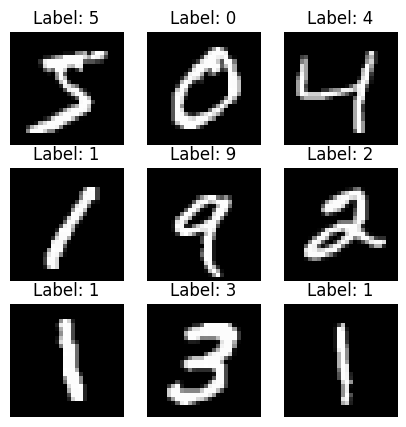

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

### Tugas Kecil
Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak
contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?

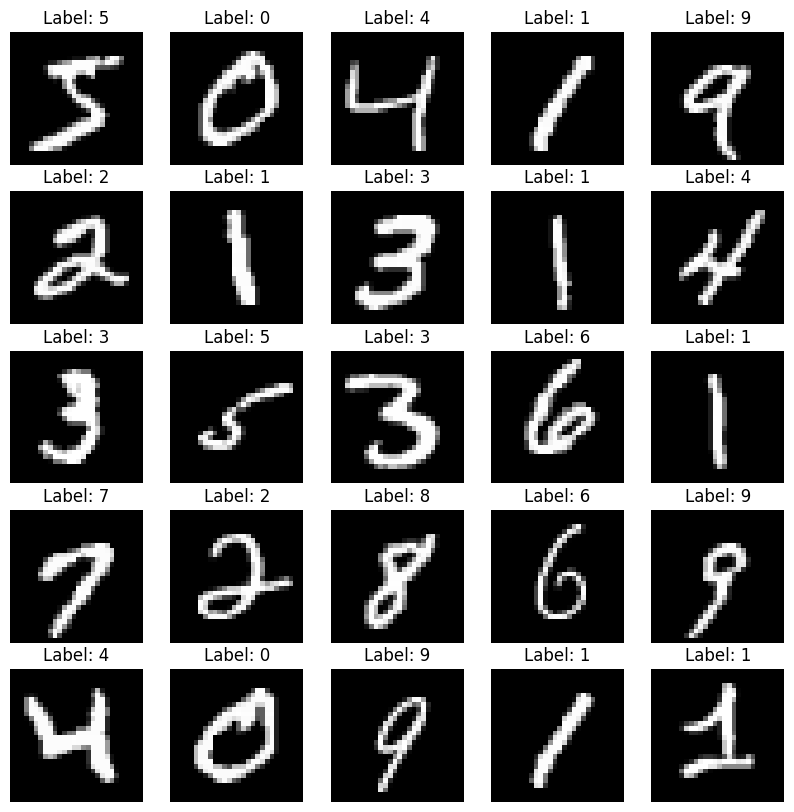

In [69]:
import matplotlib.pyplot as plt

# Asumsikan x_train dan y_train sudah ada
# (x_train, y_train), _ = mnist.load_data()

plt.figure(figsize=(10,10)) # Ukuran figure bisa diperbesar agar gambar tidak terlalu kecil
for i in range(25):
  # DIUBAH: Grid diperbesar menjadi 5x5 agar muat 25 gambar
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

## Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional
Sebelum CNN populer, pendekatan klasik digunakan. Mari kita coba Support Vector
Machine (SVM). Dataset yang kita pakai tetap MNIST, tapi gambar harus diubah menjadi
vektor 1D.

In [80]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print(f"Akurasi SVM: {accuracy_score(y_test, y_pred):.4f}")

Akurasi SVM: 0.9101


### Tugas Kecil
Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap
akurasi?

In [47]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print(f"Akurasi SVM: {accuracy_score(y_test, y_pred):.4f}")

Akurasi SVM: 0.9513


## Praktikum D3 - Membangun CNN Sederhana
Sekarang saatnya mencoba Convolutional Neural Network. CNN akan belajar mengenali pola dari gambar MNIST secara otomatis.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8920 - loss: 0.3628 - val_accuracy: 0.9802 - val_loss: 0.0774
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9802 - loss: 0.0647 - val_accuracy: 0.9848 - val_loss: 0.0550
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0426 - val_accuracy: 0.9873 - val_loss: 0.0460
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9909 - loss: 0.0284 - val_accuracy: 0.9870 - val_loss: 0.0519
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9863 - val_loss: 0.0579


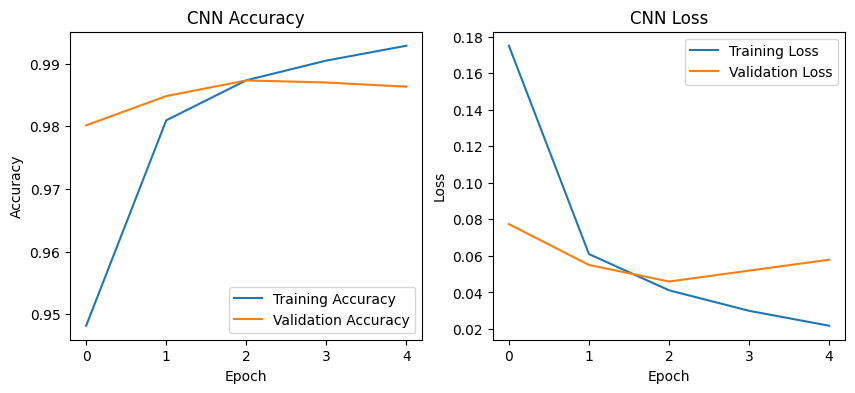

In [71]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Preprocessing
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# Model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    x_train_cnn, y_train,
    epochs=5,
    validation_split=0.1
)

# ===== Plot history =====
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tugas kecil
Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?

Epoch 1/5
1688/1688 - 9s - 6ms/step - accuracy: 0.9615 - loss: 0.1237 - val_accuracy: 0.9882 - val_loss: 0.0417
Epoch 2/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9871 - loss: 0.0402 - val_accuracy: 0.9838 - val_loss: 0.0562
Epoch 3/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9919 - loss: 0.0254 - val_accuracy: 0.9902 - val_loss: 0.0409
Epoch 4/5
1688/1688 - 6s - 3ms/step - accuracy: 0.9940 - loss: 0.0181 - val_accuracy: 0.9873 - val_loss: 0.0475
Epoch 5/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9957 - loss: 0.0125 - val_accuracy: 0.9887 - val_loss: 0.0480
Test Accuracy: 0.9875


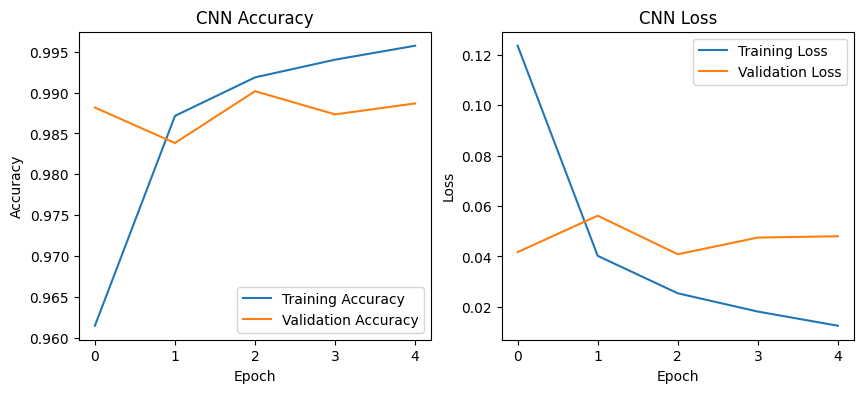

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# Model CNN dengan tambahan Conv2D
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  # Tambahan lapisan Conv2D
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    x_train_cnn, y_train,
    epochs=5,
    validation_split=0.1,
    verbose=2
)

# Evaluasi di test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# ===== Plot history =====
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D4 - Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)
MNIST mudah. Sekarang mari coba CIFAR-10, yang berisi gambar berwarna (mobil, pesawat, anjing, kucing, dll). Ini membuat model CNN bekerja lebih keras.

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3746 - loss: 1.7109 - val_accuracy: 0.5760 - val_loss: 1.2043
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5902 - loss: 1.1669 - val_accuracy: 0.6250 - val_loss: 1.0721
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6448 - loss: 1.0219 - val_accuracy: 0.6580 - val_loss: 0.9845
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6770 - loss: 0.9212 - val_accuracy: 0.6632 - val_loss: 0.9866
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7027 - loss: 0.8639 - val_accuracy: 0.6848 - val_loss: 0.9333
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7208 - loss: 0.8037 - val_accuracy: 0.6854 - val_loss: 0.9135
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7376 - loss: 0.7580 - val_accuracy: 0.6864 - val_loss: 0.9273
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7542 - loss: 0.7078 -

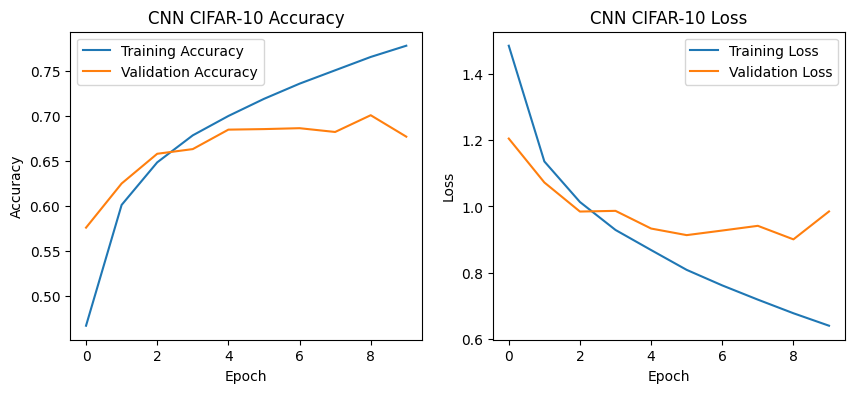

In [50]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tugas Kecil
Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir. Apa pengaruhnya pada overfitting?

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2895 - loss: 1.9083 - val_accuracy: 0.5030 - val_loss: 1.3958
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4656 - loss: 1.4741 - val_accuracy: 0.5702 - val_loss: 1.1914
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5258 - loss: 1.3281 - val_accuracy: 0.6142 - val_loss: 1.1072
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5584 - loss: 1.2371 - val_accuracy: 0.6388 - val_loss: 1.0418
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5790 - loss: 1.1823 - val_accuracy: 0.6648 - val_loss: 0.9930
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6006 - loss: 1.1294 - val_accuracy: 0.6716 - val_loss: 0.9587
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6225 - loss: 1.0765 - val_accuracy: 0.6814 - val_loss: 0.9350
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6247 - loss: 1.0521 -

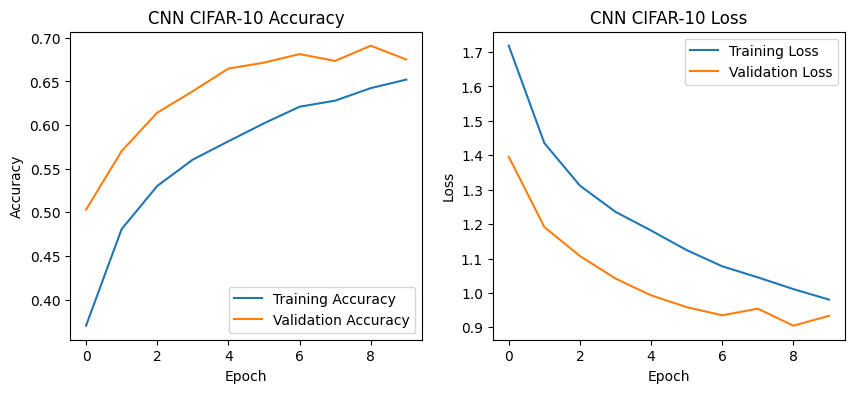

In [51]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Bangun model CNN dengan Dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),                      # Tambahan Dropout
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D5 - Transfer Learning dengan Model Pra-Latih
Bagaimana jika kita gunakan "otak" yang sudah cerdas? Misalnya VGG16 atau ResNet50 yang sudah dilatih di ImageNet. Kita tinggal memanfaatkannya.

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4569 - loss: 1.5620 - val_accuracy: 0.5734 - val_loss: 1.2266
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5766 - loss: 1.2169 - val_accuracy: 0.5702 - val_loss: 1.2202
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6008 - loss: 1.1455 - val_accuracy: 0.6020 - val_loss: 1.1446
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6115 - loss: 1.1066 - val_accuracy: 0.6086 - val_loss: 1.1245
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6286 - loss: 1.0574 - val_accuracy: 0.5974 - val_loss: 1.1425


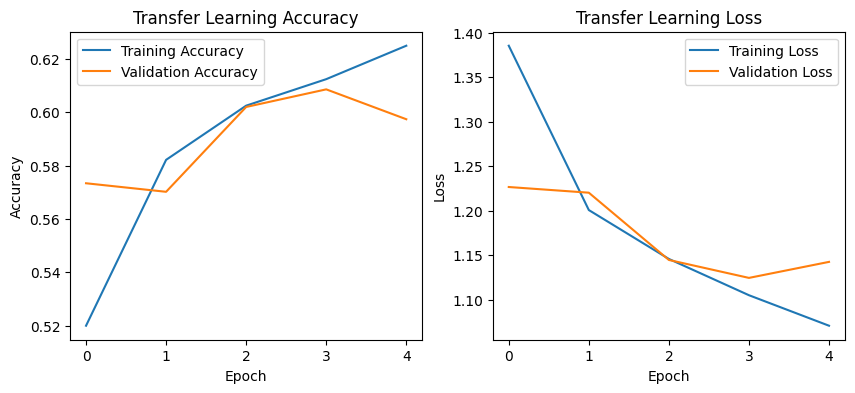

In [52]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tugas Kecil
Coba aktifkan 1-2 lapisan terkahir dari base_model (fine-tuning). Bagaimana akurasinya berubah?

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5070 - loss: 1.4066 - val_accuracy: 0.6308 - val_loss: 1.0458
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6298 - loss: 1.0597 - val_accuracy: 0.6472 - val_loss: 1.0165
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6551 - loss: 0.9833 - val_accuracy: 0.6498 - val_loss: 1.0078
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6726 - loss: 0.9233 - val_accuracy: 0.6712 - val_loss: 0.9521
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6909 - loss: 0.8783 - val_accuracy: 0.6706 - val_loss: 0.9635


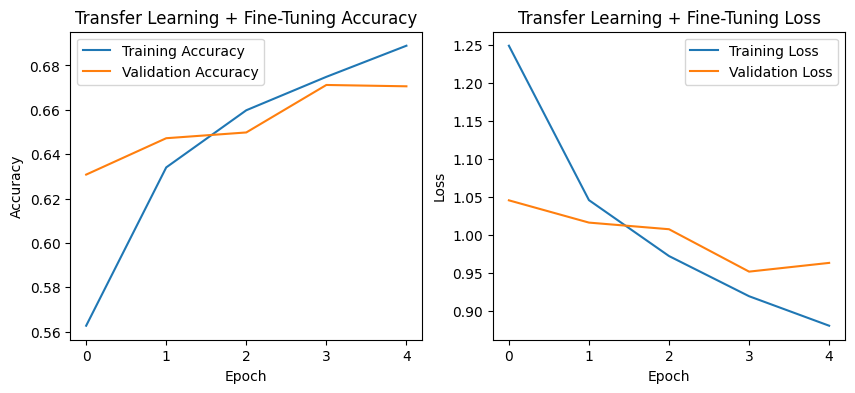

In [53]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset CIFAR-10
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Base model VGG16 tanpa top layer
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32, 32, 3))

# Pertama, freeze semua layer
base_model.trainable = True
for layer in base_model.layers[:-2]:   # Bekukan semua kecuali 2 lapisan terakhir
    layer.trainable = False

# Bangun model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning + Fine-Tuning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning + Fine-Tuning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D6 - Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1000
           1       0.72      0.79      0.75      1000
           2       0.73      0.47      0.58      1000
           3       0.56      0.40      0.47      1000
           4       0.57      0.62      0.60      1000
           5       0.59      0.56      0.57      1000
           6       0.55      0.83      0.66      1000
           7       0.76      0.68      0.72      1000
           8       0.77      0.78      0.77      1000
           9       0.67      0.77      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



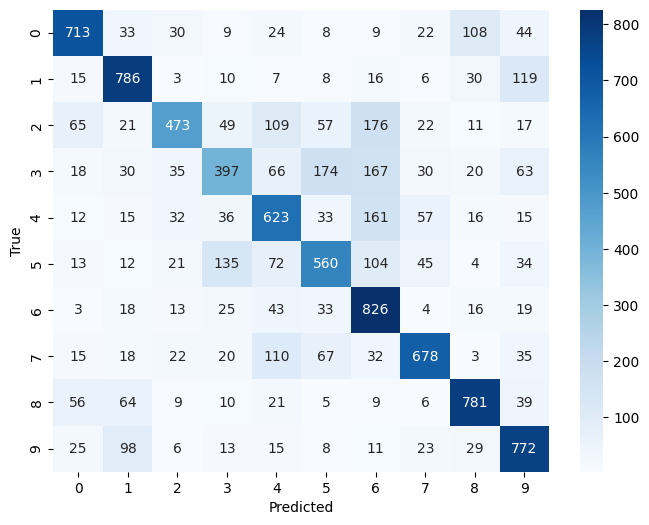

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Tugas Kecil
Dari confusion matrix, identifikasi kelas apa yang paling sering salah diklasifikasikan. Menurut Anda, mengapa hal itu bisa terjadi

#### **Jawaban**:
Kelas yang paling sering salah diklasifikasikan adalah kelas 2 dan kelas 3. Hal ini terjadi karena adanya kemiripan bentuk visual dengan kelas lain (misalnya 2 mirip dengan 0, 4, 6 dan 3 mirip dengan 5 atau 8), serta kemungkinan dipengaruhi oleh kualitas data atau distribusi dataset yang tidak seimbang.

# Penugasan

*   Tulis 1-3 digit(0-9) di kertas putih dengan spidol/bolpen tebal (ukuran besar, kontras jelas)
*   Foto lurus dari  atas, pencahayaan merata, tanpa bayangan besar
*   Upload foto ke Google Colab
*   Pre-process gambar agar sesuai  format MNIST (28X28, grayscale)
*   Klasifikasi dengan salah satu model:
    *   CNN (D3) -> butuh tensor shape (1, 28, 28, 1)
    *   SVM (D2) -> butuh vektor 784 (flatten 28X28)







In [97]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit jadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim -> (28,28,1)
    arr = arr[..., None]

    return canvas, arr


Saving yea.jpg to yea.jpg


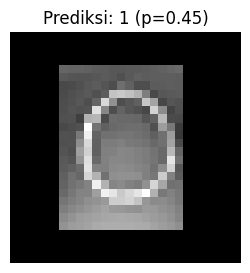

Rekap Prediksi (CNN):
- yea.jpg -> 1 (p=0.449)


In [98]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
  img_pil = Image.open(fname)
  disp, x = preprocess_to_mnist_28x28(img_pil)
  x_batch = np.expand_dims(x, axis=0)
  probs = model.predict(x_batch, verbose=0) [0]
  pred = int(np.argmax(probs))
  conf = float(np.max(probs))

  results.append((fname, pred, conf))

  # Tampilkan hasil
  plt.figure(figsize=(3,3))
  plt.imshow(disp, cmap='gray')
  plt.title(f"Prediksi: {pred} (p={conf:.2f})")
  plt.axis('off')
  plt.show()

print("Rekap Prediksi (CNN):")
for r in results:
  print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")